In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def plot_pca(dataframe, fitted_pca, arrow_scale=0.2, width=0.04):
    _, axs = plt.subplots(1, 4, figsize=(16, 6))
    
    sns.scatterplot(dataframe, x=dataframe.columns[0], y=dataframe.columns[1], ax=axs[0])
    axs[0].set_aspect('equal', adjustable='box')
    axs[0].set_title('Original Data')
    
    xlim = axs[0].get_xlim()
    ylim = axs[0].get_ylim()
    
    axs[1].quiver(dataframe.mean().iloc[0], dataframe.mean().iloc[1], fitted_pca.components_[0][0], fitted_pca.components_[0][1], angles='xy', scale_units='xy', scale=arrow_scale, color='r', label='PC1', width=width)
    axs[1].quiver(dataframe.mean().iloc[0], dataframe.mean().iloc[1], fitted_pca.components_[1][0], fitted_pca.components_[1][1], angles='xy', scale_units='xy', scale=arrow_scale, color='b',label='PC2', width=width)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xlim(xlim)
    axs[1].set_ylim(ylim)
    axs[1].set_xlabel('Height(Inches)')
    axs[1].set_ylabel('Weight(Pounds)')
    axs[1].set_title('Principal Component Vectors')
    
    axs[2].quiver(dataframe.mean().iloc[0], dataframe.mean().iloc[1], fitted_pca.components_[0][0], fitted_pca.components_[0][1], angles='xy', scale_units='xy', scale=arrow_scale / fitted_pca.explained_variance_ratio_[0], color='r', label='PC1', width=width)
    axs[2].quiver(dataframe.mean().iloc[0], dataframe.mean().iloc[1], fitted_pca.components_[1][0], fitted_pca.components_[1][1], angles='xy', scale_units='xy', scale=arrow_scale / fitted_pca.explained_variance_ratio_[1], color='b', label='PC2', width=width)
    axs[2].set_aspect('equal', adjustable='box')
    axs[2].set_xlim(xlim)
    axs[2].set_ylim(ylim)
    axs[2].set_xlabel('Height(Inches)')
    axs[2].set_ylabel('Weight(Pounds)')
    axs[2].set_title('Scaled Principal Component Vectors')
    
    sns.lineplot(x=np.linspace(1, 2, 2, dtype=np.uint8), y=np.cumsum(fitted_pca.explained_variance_ratio_), ax=axs[3])
    axs[3].set_xlim(0.9, 2.1)
    axs[3].set_ylim(0, 1.1)
    axs[3].set_xlabel("PCA Dimension")
    axs[3].set_ylabel("Cumulative Variance Ratio")
    
    plt.tight_layout()
    plt.show()

a)

In [3]:
df = pd.read_csv('SOCR-HeightWeight_small.csv')
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,70.09805,138.9394
2,68.68038,120.6936
3,63.62233,107.4236
4,70.05146,134.6655


In [4]:
pca = PCA(n_components=2)
_ = pca.fit(df)

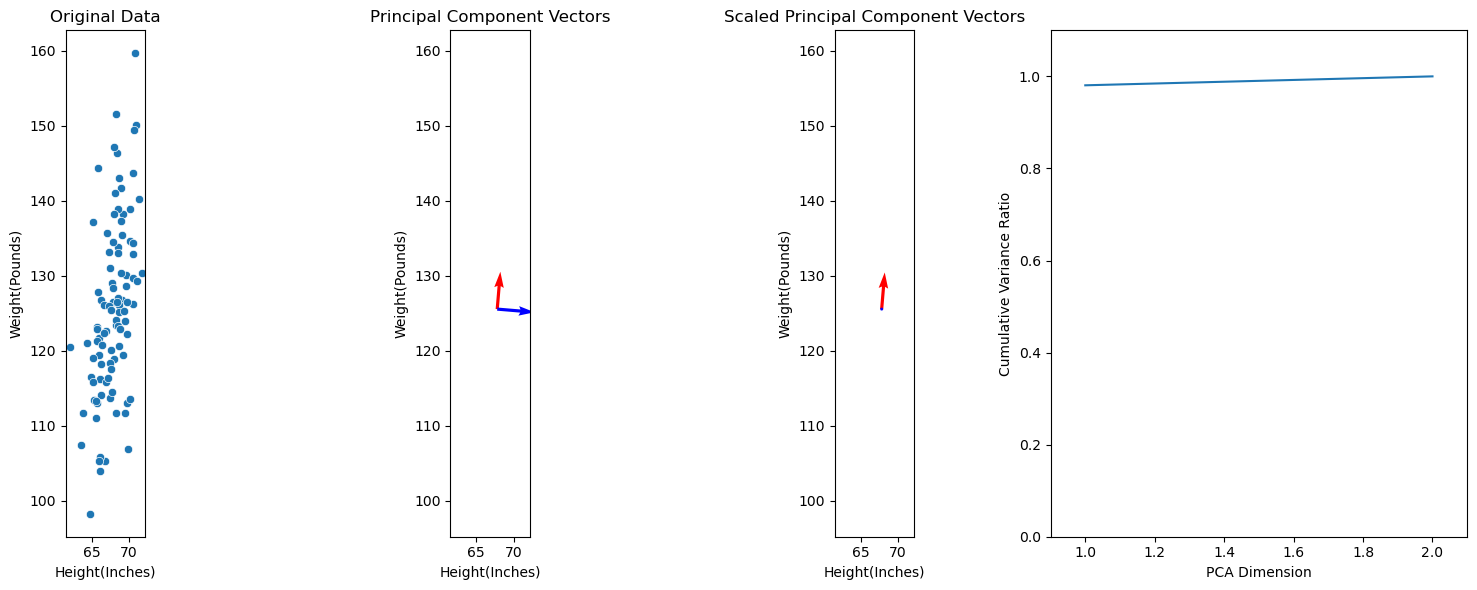

In [5]:
plot_pca(df, pca)

In the second plot we can see that most of the variance can be explained by principal components that are almost parallel to the two axes. So in the end each variable is pretty much only contributing to one of the principal components. In the third and fouth we additionally can see that the first principal component explains almost all the variance in the data.

b)

In [6]:
df_metric = df.copy()
df_metric['Height(Meters)'] = df['Height(Inches)'].apply(lambda x: x / 39.37)
df_metric['Weight(Kilograms)'] = df['Weight(Pounds)'].apply(lambda x: x / 2.205)
df_metric.drop(columns=['Height(Inches)', 'Weight(Pounds)'], inplace=True)
df_metric.head()

,Height(Meters),Weight(Kilograms)
0,1.670899,51.243764
1,1.780494,63.011066
2,1.744485,54.736327
3,1.616010,48.718186
4,1.779311,61.072789


In [7]:
pca = PCA(n_components=2)
_ = pca.fit(df_metric)

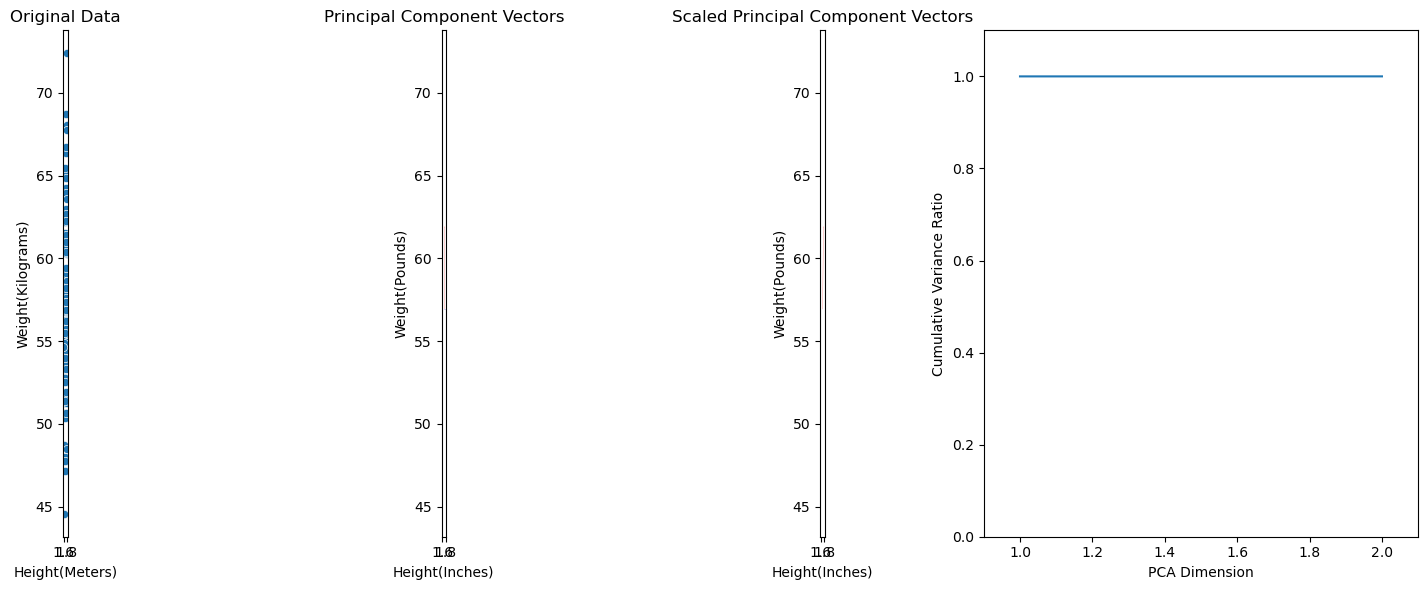

In [8]:
plot_pca(df_metric, pca)

The plots are not really helpful here but basically this conversion made things even worse since the value ranges of the two attributes are even more different.

c)

In [9]:
df_us_norm = df.copy()
df_us_norm = (df_us_norm - df_us_norm.mean()) / df_us_norm.std()
df_us_norm.head()

,Height(Inches),Weight(Pounds)
0,-1.068414,-1.077496
1,1.195718,1.149933
2,0.451805,-0.416390
3,-2.202375,-1.555562
4,1.171271,0.783038


In [10]:
pca = PCA(n_components=2)
_ = pca.fit(df_us_norm)

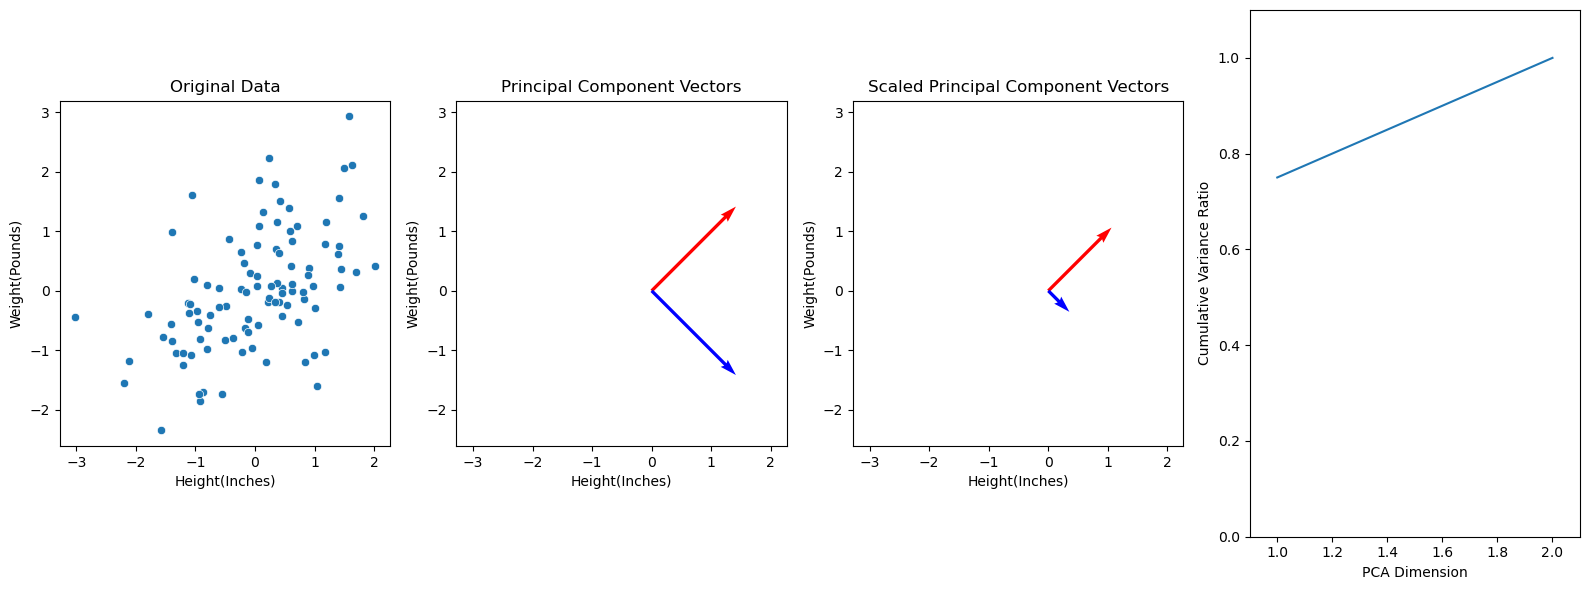

In [11]:
plot_pca(df_us_norm, pca, arrow_scale=0.5, width=0.01)

In [12]:
df_metric_norm = df_metric.copy()
df_metric_norm = (df_metric_norm - df_metric_norm.mean()) / df_metric_norm.std()
df_metric_norm.head()

,Height(Meters),Weight(Kilograms)
0,-1.068414,-1.077496
1,1.195718,1.149933
2,0.451805,-0.416390
3,-2.202375,-1.555562
4,1.171271,0.783038


In [13]:
pca = PCA(n_components=2)
_ = pca.fit(df_metric_norm)

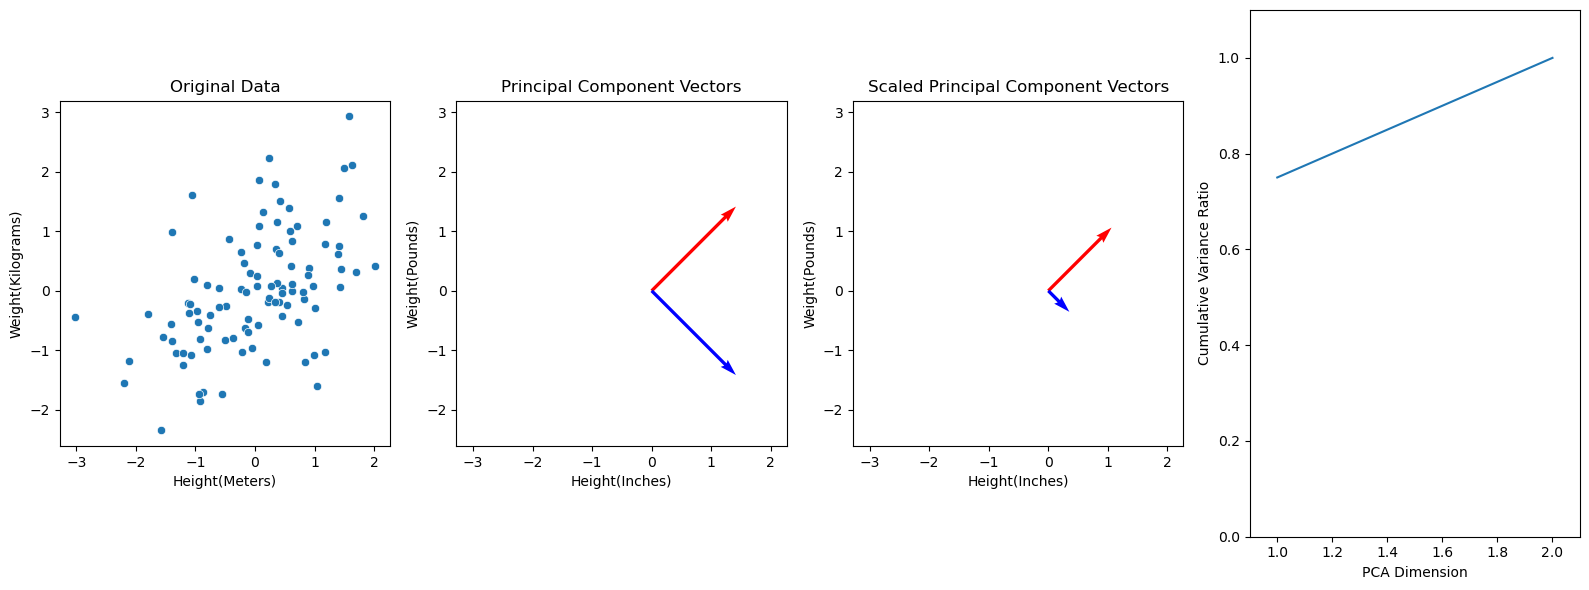

In [14]:
plot_pca(df_metric_norm, pca, arrow_scale=0.5, width=0.01)

We can see that after standardization we get a much better result for the PCA where both components are not parallel to the original axes. Although the first principal component still covers most variance we now know this is not due to the different ranges. Furthermore the third and fourth plot show that the second principal component still explains a good part of the variance which was not the case in the dataset without standardization. The PCA now also does not depend on the uesed units anymore.

d)

In this case we would definitely recommend standardization before PCA. Without standardization we would just get a pair of principal coponents that don't give us any more information than the two original axes. Also we were dependent on the used units which should not influence the results of our search for the datasets structure. Both problems could be solved by standardization. Now the two principal components have a different orientation compared to the original axes and give us a good understanding how height and weight are connected, without influence of the measurement unit.

e)

In the first scenario it does not really make sense to apply standardization since both attributes are already on a common scale. If we use standardization we would get rid of the fact that there is much more variation in the rating of the exercise compared to the lecture. After standardization, a score of 6 for the lecture might be interpreted as being as difficult as a score of 8 for the exercise.

In the second scenario it would make sense to apply standardization since the different bones might have very diiferent sizes. Without standardization large deviations from the 'healthy lenght' in smaller bones like the fingers could be overshadowed by small variations in large bones like the femur. This would make it much harder to differentiate the different clusters.